<a href="https://colab.research.google.com/github/anassbelkas/Arabic_letters/blob/main/Arabic_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load other modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Load the data into a pandas data frame
data = pd.read_csv("mnist-arabic.csv")

# Shuffle the rows
data = data.sample(frac=1)

# Split the data into a training set and a test set
train, test = train_test_split(data, test_size=0.25)

In [ ]:
#Printing the size of the dataframe
print ("Training dataset a %i observations et %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset a %i observations et %i variables" %(test.shape[0], test.shape[1]))

Training dataset a 5544 observations et 785 variables
Testing dataset a 1848 observations et 785 variables


In [ ]:
#check few rows
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
2065,dal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2969,hhae_middle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6435,waw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6728,waw_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1581,alif_end,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Seperate the target and independant variables
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [ ]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

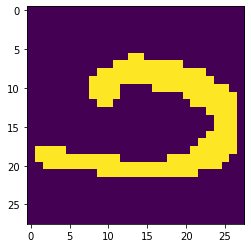

In [ ]:
print_image(0, X_train)

In [ ]:
#Check the frequency of each letter
y_train.value_counts().sort_index()

ain            16
ain_end        19
ain_middle     59
ain_start      78
alif          588
             ... 
yae_end       150
yae_middle    241
yae_start      71
zae            17
zae_end        17
Name: label, Length: 61, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


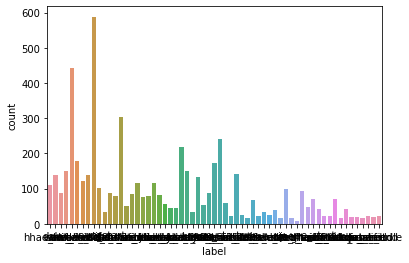

In [ ]:
sns.countplot(y_train)

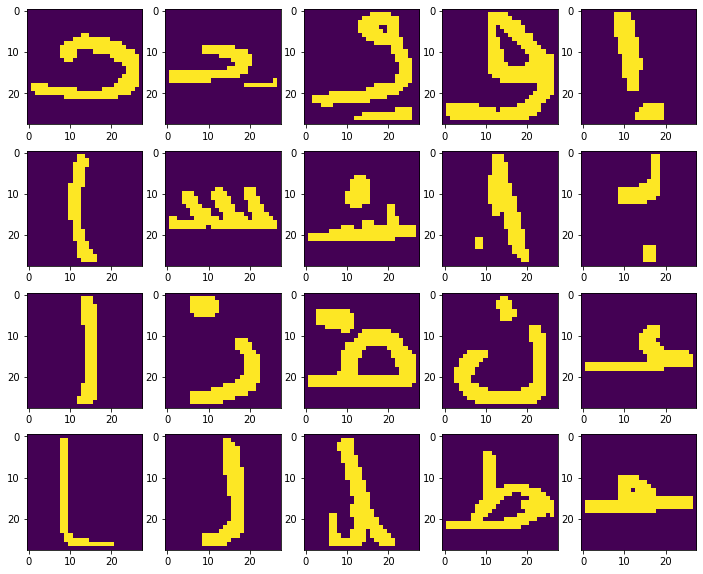

In [ ]:
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    print_image(i, X_train)

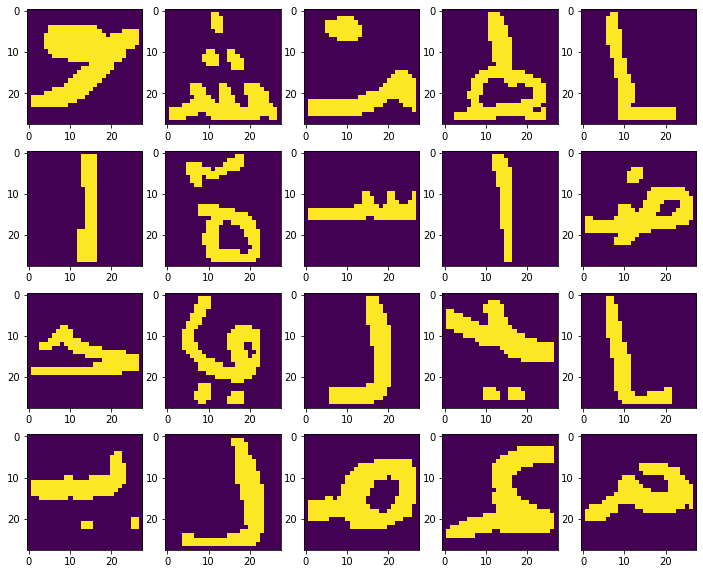

In [ ]:
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    print_image(i, X_test)

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=15)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [ ]:
# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print('Accuracy score = ', round(accuracy * 100,1),'%')
print ("Classification Report")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion)

Accuracy: 0.7121212121212122
Accuracy score =  71.2 %
Classification Report
                  precision    recall  f1-score   support

             ain       0.67      0.33      0.44         6
         ain_end       0.83      0.62      0.71         8
      ain_middle       0.79      0.50      0.61        22
       ain_start       0.69      0.42      0.52        26
            alif       0.84      0.96      0.89       185
        alif_end       0.88      0.88      0.88       179
    alif_maqsora       0.00      0.00      0.00         4
         bae_end       0.88      0.88      0.88        16
      bae_middle       0.50      0.09      0.15        22
       bae_start       0.55      0.84      0.67        44
       dad_start       1.00      0.22      0.36         9
             dal       0.67      0.85      0.75        26
         dal_end       0.67      0.67      0.67        43
          fa_end       0.50      0.33      0.40         3
       fa_middle       0.67      0.20      0.31      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Cross validation
rf=RandomForestClassifier(n_estimators=200)
score = cross_val_score(rf, X_train, y_train)
print(np.mean(score))

0.6872309915916053


In [ ]:
pred = pd.Series(y_pred,name="Label")
pred.head(20)

0          waw_end
1     sheen_middle
2      noun_middle
3        ta_middle
4         alif_end
5             alif
6     tae_marbouta
7      seen_middle
8             alif
9       seen_start
10      khae_start
11         yae_end
12       lam_start
13      yae_middle
14        alif_end
15      yae_middle
16       lam_start
17       mim_start
18           hamza
19      mim_middle
Name: Label, dtype: object

In [ ]:
#generation d'un csv resultat
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,5001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

In [ ]:
#Autre methode
from sklearn.tree import DecisionTreeClassifier

num_trees = 200
clfs = []
for i in range(num_trees):
  clf = DecisionTreeClassifier(max_depth=15)
  clf.fit(X_train, y_train)
  clfs.append(clf)

In [ ]:
y_preds = []
for clf in clfs:
  y_pred = clf.predict(X_test)
  y_preds.append(y_pred)

In [ ]:
accuracys = []
for y_pred in y_preds:
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  accuracys.append(accuracy)

In [ ]:
print("Test accuracy:", np.mean(accuracys))
#Test accuracy: 0.5230898268398269